<h1>Analyzing San Diego DUI Collision Patterns</h1>

<h2>Overview</h2>

We set out to study and identify DUI collision patterns in San Diego. Our project's goal was to study the correlation of time and location to DUI collisions. We found that time has a correlation, but not location.  Based on the results, the spatial model has a slightly higher accuracy than the time model, however, both models tend to have a low degree of precision. Thus even though time is correlated to DUI collisions and bar density is not, both models are not accurate predictors. 

<h2>Names</h2>

* Ahmed Hussaini
* Jordyn Ohashi
* Palaksh V Rungta
* Peter Huang
* Yueh-Ting Wang (Tina)

<h2>Research Question</h2>

For our final project, we are interested in analyzing patterns of DUI collisions in San Diego County, more specifically,

* Are DUI collisions randomly distributed across San Diego County?
* Are DUI collisions correlated to the presence of bars?
* Based on the above information, is it possible to come up with a predictive model to determine whether a collision at a specific time or location is a DUI collision or not?

<h2>Background and Prior Work</h2>

We were drawn to the topic of DUIs due to the fact that DUI car accidents have made an impact on each of our lives. One group member just lost a high school friend due to a drunk driver. Another person in the car survived, but her life is forever changed due to the loss of her cousin and a severe head injury.

Alcohol accounts for 28% of all traffic-related deaths in the United States. There is one death every 50 minutes due to alcohol-related crashes. [[1](https://www.cdc.gov/motorvehiclesafety/impaired_driving/impaired-drv_factsheet.html#:~:text=In%202016%2C%2010%2C497%20people%20died,involved%20an%20alcohol%2Dimpaired%20driver)] Car crashes come out of nowhere and have drastic consequences. The frequency of deaths shows the need to create more solutions to curve or end the problem, especially in San Diego. San Diego has the most number of drivers with DUIs amoung the USAs 15 most populous urban centers.[[2](https://insurify.com/insights/drunk-driving-capitals-of-the-u-s/)]

We have come across research that concludes that drinking outside of your home leads to a higher chance of drunk driving.[[3](https://pubmed.ncbi.nlm.nih.gov/18624990/)] There are a lot of factors that contribute to alcohol related consequences such as where the drinking began. Thus where we got our hypothesis that there is a correlation between bars and DUI crashes. Time has an effect on DUI crashes.[[4](https://crashstats.nhtsa.dot.gov/Api/Public/ViewPublication/811523)]

A project we found related to this topic is the SWITRS GIS Map which is an interactive map to view the exact location of collision data however.[[5](https://tims.berkeley.edu)] Apart from this mapping, we did not come across many visualizations where the exact location of traffic accidents were mapped in relation to DUI cases.

<h2>Hypothesis</h2>

We hypothesize that there will be a high number of DUI collisions from late night to early morning. [[4](https://crashstats.nhtsa.dot.gov/Api/Public/ViewPublication/811523)] DUI collisions are likelier to occur at night because that is when most people are off of work and engage in social drinking. 

We have a second hypothesis that there would be a larger amount of collisions caused due to driving under the influence (DUI) of alcohol in areas in close proximity to alcohol serving bars compared to the number of DUI collisions in areas with a lower bar density. We are predicting this positive correlation as areas with a higher presence of bars will tend to have more people who might get drunk and drive back home, and thus may result in a collision. [[6](https://www.jsad.com/doi/10.15288/jsad.2018.79.702)]


#### References
[1] https://www.cdc.gov/motorvehiclesafety/impaired_driving/impaired-drv_factsheet.html#:~:text=In%202016%2C%2010%2C497%20people%20died,involved%20an%20alcohol%2Dimpaired%20driver

[2] https://insurify.com/insights/drunk-driving-capitals-of-the-u-s/

[3] https://pubmed.ncbi.nlm.nih.gov/18624990/

[4] https://crashstats.nhtsa.dot.gov/Api/Public/ViewPublication/811523

[5] https://tims.berkeley.edu

[6] https://www.jsad.com/doi/10.15288/jsad.2018.79.702

<h2>Datasets</h2>

* Dataset Name: San Diego Traffic Collisions - Basic Reports
* Link to the dataset: https://data.sandiego.gov/datasets/police-collisions/
* Number of observation: 59144

<p>Dataset that lists traffic collisions and has basic information about the collisions recorded by the San Diego Police Department. The data is recorded from years 2015 through 2020.</p>


* Dataset Name: TIGER/Line Shapefile, 2018, county, San Diego County, CA, All Roads County-based Shapefile
* Link to dataset: https://catalog.data.gov/dataset/tiger-line-shapefile-2018-county-san-diego-county-ca-all-roads-county-based-shapefile
* Number of observations: 67775

This dataset contains the shapefile of San Diego which we use for geo mapping.


* Dataset Name: 
* Link to dataset: https://sdgis-sandag.opendata.arcgis.com/datasets/city-council-districts
* Number of observations: 49

This dataset contains the shapefile of San Diego by civil districts which we use for geo mapping, especially the choropleth mapping.

#### Acknowledgement:
The bars location data and the geocoding of addresses of collisions in San Diego were taken from the <b>Google Places API</b> and the <b>Google Geocoding API</b>.

The DUI collisions location data was geocoded by Nominatim's API

<h2>Setup</h2>

In [1]:
# Display plots directly in the notebook instead of in a new window
%matplotlib inline

# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import IPython
import requests
import scipy
from scipy.stats import norm
from scipy.stats import kstest
from scipy.spatial import KDTree
import patsy
import statsmodels.api as sm
from shapely.geometry import Point, Polygon
import geopandas
from geopy.geocoders import Nominatim 
from geopy import distance
import gmplot
import folium
from folium import plugins
import fiona

# create random value
from numpy.random import seed
from numpy.random import randint
import random

#For machine learning classification task 
from sklearn.svm import SVC
from sklearn.metrics import classification_report, precision_recall_fscore_support
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

# Remove all warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# load the datasets
df = pd.read_csv('sd_traffic_collisions.csv')
df_dui = pd.read_csv('sd_dui.csv')

<h2>Data Cleaning</h2>

<h3>SD collision data</h3>

In [3]:
df.head()

,report_id,date_time,police_beat,address_no_primary,address_pd_primary,address_road_primary,address_sfx_primary,address_pd_intersecting,address_name_intersecting,address_sfx_intersecting,violation_section,violation_type,charge_desc,injured,killed,hit_run_lvl
0,500002,2015-01-01 00:01:00,627,3700,,VERMONT,STREET,,,,22107,VC,TURNING MOVEMENTS AND REQUIRED SIGNALS,0,0,MISDEMEANOR
1,500098,2015-01-01 00:01:00,725,6000,,VISTA SAN ISIDRO,,,,,22107,VC,TURNING MOVEMENTS AND REQUIRED SIGNALS,0,0,MISDEMEANOR
2,500436,2015-01-01 01:35:00,712,100,E,SAN YSIDRO,BOULEVARD,,,,22107,VC,TURNING MOVEMENTS AND REQUIRED SIGNALS,1,0,NaN
3,500166,2015-01-01 02:00:00,438,2600,,RACHEL,,,,,MISC-HAZ,VC,MISCELLANEOUS HAZARDOUS VIOLATIONS OF THE VEHI...,0,0,MISDEMEANOR
4,500429,2015-01-01 02:30:00,813,4600,,30TH,STREET,,,,22107,VC,TURNING MOVEMENTS AND REQUIRED SIGNALS,1,0,MISDEMEANOR


<p>The dataset has 15 columns that have information about collisions in San Diego. We only kept the information relevant to our project.</p>

* date_time: date and time of collision
* police_beat: San Diego police beat
* address_no_primary: Street number of collision location, abstracted to block level
* address_pd_primary: Direction of street in location
* address_road_primary: Name of street
* address_sfx_primary: Street type
* violation_section: Violation section for primary collision factor
* violation_type: Violation type for primary collision factor
* charge_desc: Violation section description for primary collision factor
* injured: Number of people injured in collision
* killed: Number of people killed in collision
* hit_run_lvl: Level of violation, if collision was a hit & run

<p1>We drop columns 'address_pd_intersecting', 'address_name_intersecting', 'address_sfx_intersecting', and 'report_id'</p1>

We drop report_id to prevent any privacy concerns.

<p2>We are dropping these columns because they are added only when a collision happens at intersection. Another reason we drop these columns is that the address primary columns have enough information for us to later on use geocoding to find the geolocation of each collision.</p2>

In [4]:
df = df.drop(columns = ['address_pd_intersecting','address_name_intersecting','address_sfx_intersecting', 'report_id'])

In [5]:
#replace nan with none for hit and run column
df['hit_run_lvl'] = df['hit_run_lvl'].fillna('NONE')

In [6]:
#function to create address primary consolidated
def create_address_primary(no,pd,road,sfx):
    addy =''
    
    #check if all are empty
    if ' '== no and ' '== pd and ' '== road and ' '== sfx:
        output = np.nan
        
    else:
        #check if args are empty & combine
        if ' ' == pd:
            addy = str(no) + ' '+str(road) +' '+ str(sfx)
        elif ' ' == sfx:
            addy = str(no) + ' '+str(pd) +' '+ str(road)
        else:
            addy = str(no) + ' '+str(pd) + ' ' + str(road) + ' '+ str(sfx)
    
        #add city and state to addy
        output = addy+','+'San Diego'+','+'CA'
        
    return output

In [7]:
#Create a new column to combine address columns into one
#This way it is easier to use geocoding to find the geolocation information
df['address_primary'] = df.apply(lambda x: create_address_primary(x.address_no_primary,x.address_pd_primary,x.address_road_primary,x.address_sfx_primary),axis=1)

In [8]:
#split date_time column into separate columns
df['year'] = pd.DatetimeIndex(df['date_time']).year
df['month'] = pd.DatetimeIndex(df['date_time']).month
df['day'] = pd.DatetimeIndex(df['date_time']).day
df['hour'] = pd.DatetimeIndex(df['date_time']).hour

In [9]:
#The function groups the hours into 5 groups 
#Group 1 is late morning, group 2 afternoon, ...., group 5 is early morning 
#The reason we split our code into groups is because we are hypothesizing the probability of DUI collision will
#be higher as the group number increases, thus, group 5 (early morning) should have the highest probability.
def group_hour(hour):
    if hour >= 5 and hour <= 9:
        output = 1
    elif hour >= 10 and hour <= 14:
        output = 2
    elif hour >= 15 and hour <= 19:
        output = 3
    elif hour >= 20 and hour <= 24:
        output = 4
    elif hour >= 0 and hour <= 4:
        output= 5
    else: 
        output = np.nan
    return output

In [10]:
#create column for time of day
df['time_day'] = df['hour'].apply(group_hour)

In [11]:
#function to determine whether or not a collision is a DUI
def col_dui(desc):
    if 'DUI' in desc:
        return 1
    else:
        return 0

In [12]:
#apply col_dui function to create new column where 1=DUI & 0=nonDUI
df['DUI'] = df['charge_desc'].apply(col_dui)

In [13]:
#reorganize the columns
df = df[['date_time',
         'year',
         'month',
         'day',
         'hour',
         'time_day',  
         'police_beat',
         'address_no_primary',
         'address_pd_primary',
         'address_road_primary',
         'address_sfx_primary',
         'address_primary',
         'violation_section',
         'violation_type',
         'charge_desc',
         'DUI',
         'injured',
         'killed',
         'hit_run_lvl',]]

<h3>SD collisions data (DUI only)</h3>

sd_dui.csv (df_dui) is a dataset from collisions_datasd.csv (df).

The only difference is that df_dui has 3 extra columns:lat, long, and gcode. We only applied geocoding to convert the DUI collisions to geolocations due to the limited number of conversion we were allowed to do by the API.

We used Nominatim's API to geocode the addresses of DUI collisions into Latitude and Longitude.

Learn how to convert addresses to geolocation with[1]

[1] https://medium.com/@peterhaas_38970/how-to-geocode-with-python-and-pandas-4cd1d717d3f7

We are commenting out the geocoding code below as we had a limited number of API calls. We then wrote the information into the csv file named 'sd_dui.csv' so we would not have to run it again.

In [14]:
'''
geolocator = Nominatim(timeout = 10, user_agent = "myGeolocator")
df_dui['gcode'] = df_dui['address_primary'].apply(geolocator.geocode)

df_dui['lat'] = 0.0
df_dui['long'] = 0.0

for item in df_dui['gcode']:
    df_dui['lat'] = (item.latitude)
    df_dui['long'] = (item.longitude)

df_dui.to_csv('sd_dui.csv', index = False)
'''

'\ngeolocator = Nominatim(timeout = 10, user_agent = "myGeolocator")\ndf_dui[\'gcode\'] = df_dui[\'address_primary\'].apply(geolocator.geocode)\n\ndf_dui[\'lat\'] = 0.0\ndf_dui[\'long\'] = 0.0\n\nfor item in df_dui[\'gcode\']:\n    df_dui[\'lat\'] = (item.latitude)\n    df_dui[\'long\'] = (item.longitude)\n\ndf_dui.to_csv(\'sd_dui.csv\', index = False)\n'

### Bar Location Data

We gathered a dataset of all the bars in San Diego usnig the code below. We did this using the Google Places API to find the location of all bars across San Diego.
(Learn more about how we used the Google Places API here: https://developers.google.com/places/web-service/search )

As we were unable to find a dataset of all bars in San Diego, and as the Google Places API had a limit on the number of results it provides in an area, we countered the issue by randomly generating around 2000 coordinates in San Diego using the rand_dist() function created above, and calling the geocoding Google Places API on each point with a 3 kilometer radius. We then appended each result in dictionary and saved the dictionary in a file named 'bar_names_data.json' so that we do not have to run the code again.

In [15]:
'''
df = rand_dist(2000)
df_bars_geocoding = df[['lat', 'long']]

key = "" # API KEY HERE
link_part_1 = "https://maps.googleapis.com/maps/api/place/nearbysearch/json?location="
link_part_2 = "&radius=3000&type=bar&key=" + key # this searches for bars around a 3000 meter radius of a given point
bar_dict = {}

for i in range(len(df_bars_geocoding)):
    
    lat = df_bars_geocoding['lat'][i]
    long = df_bars_geocoding['long'][i]
    overall_link = link_part_1 + str(lat) + "," + str(long) + link_part_2
    
    json_data = requests.get(overall_link).json()
    bar_res = json_data['results']
    
    for item in bar_res:
        bar_dict[item['name']] = [item['geometry']['location']['lat'], item['geometry']['location']['lng']]
        
    if(len(json_data['html_attributions']) != 0):
        print(json_data['html_attributions']) #to display any attributions

with open('bar_names_data.json', 'w') as bar_data:
    json.dump(bar_dict, bar_data)
'''

'\ndf = rand_dist(2000)\ndf_bars_geocoding = df[[\'lat\', \'long\']]\n\nkey = "" # API KEY HERE\nlink_part_1 = "https://maps.googleapis.com/maps/api/place/nearbysearch/json?location="\nlink_part_2 = "&radius=3000&type=bar&key=" + key # this searches for bars around a 3000 meter radius of a given point\nbar_dict = {}\n\nfor i in range(len(df_bars_geocoding)):\n    \n    lat = df_bars_geocoding[\'lat\'][i]\n    long = df_bars_geocoding[\'long\'][i]\n    overall_link = link_part_1 + str(lat) + "," + str(long) + link_part_2\n    \n    json_data = requests.get(overall_link).json()\n    bar_res = json_data[\'results\']\n    \n    for item in bar_res:\n        bar_dict[item[\'name\']] = [item[\'geometry\'][\'location\'][\'lat\'], item[\'geometry\'][\'location\'][\'lng\']]\n        \n    if(len(json_data[\'html_attributions\']) != 0):\n        print(json_data[\'html_attributions\']) #to display any attributions\n\nwith open(\'bar_names_data.json\', \'w\') as bar_data:\n    json.dump(bar_dict, 

We plotted the bars data on a map of San Diego to visualize the distribution using a package named [gmplot](https://pypi.org/project/gmplot/) as Google Places API requires us to use a Google Map to display data obtained using their API. Using the code below, we can visualize the output file 'bars_in_sd.html'



In [16]:
# Loading bar data
with open('bar_names_data.json', 'r') as bar:
     bar_dict = json.load(bar)

Here, we perform some data cleaning as we noticed some bars from Tijuana belonged to our dataset as a result of us calling Google Places API on 3000 meter radius of points near the border. We clean this data and then save the updated data in the same file 'bar_names_data.json'

In [17]:
for i in list(bar_dict):
    
    if bar_dict[i][0] < 32.55289:
        del bar_dict[i]

with open('bar_names_data.json', 'w') as bar_data_2:
    json.dump(bar_dict, bar_data_2)

In [18]:
'''
with open('bar_names_data.json', 'r') as bar:
     bar_dict = json.load(bar)

# Using gmplot package
gmplot_obj = gmplot.GoogleMapPlotter(32.903099, -117.121593, 10, apikey = 'YOUR API KEY HERE')

for i in bar_dict:
    gmplot_obj.marker(bar_dict[i][0], bar_dict[i][1], color='steelblue')

gmplot_obj.draw('bars_in_sd.html')
'''

"\nwith open('bar_names_data.json', 'r') as bar:\n     bar_dict = json.load(bar)\n\n# Using gmplot package\ngmplot_obj = gmplot.GoogleMapPlotter(32.903099, -117.121593, 10, apikey = 'YOUR API KEY HERE')\n\nfor i in bar_dict:\n    gmplot_obj.marker(bar_dict[i][0], bar_dict[i][1], color='steelblue')\n\ngmplot_obj.draw('bars_in_sd.html')\n"

Check out the visualization of bars in San Diego in the HTML file attached below:

<a target="_blank" href = "geo_mapping/bars_in_sd.html"> bars_in_sd.html </a>

<h2>Data Analysis & Data Visualization</h2>

<h3>Data Analysis & Data Visualization for Time</h3>

<h4>Collision Count Plot Analysis</h4>

To learn more about our data, both collisions and DUI collisions, we seperated our data by year to find the percentage of reported cases in our data

In [19]:
#separating accidents by year
df_2015 = df[df['date_time'].str.contains('2015', regex=True) == True]
df_2016 = df[df['date_time'].str.contains('2016', regex=True) == True]
df_2017 = df[df['date_time'].str.contains('2017', regex=True) == True]
df_2018 = df[df['date_time'].str.contains('2018', regex=True) == True]
df_2019 = df[df['date_time'].str.contains('2019', regex=True) == True]
df_2020 = df[df['date_time'].str.contains('2020', regex=True) == True]

In [20]:
#number of DUIs by year
dui_2015 = df_2015['charge_desc'].str.contains('DUI', regex=True).sum() 
dui_2016 = df_2016['charge_desc'].str.contains('DUI', regex=True).sum()
dui_2017 = df_2017['charge_desc'].str.contains('DUI', regex=True).sum() 
dui_2018 = df_2018['charge_desc'].str.contains('DUI', regex=True).sum() 
dui_2019 = df_2019['charge_desc'].str.contains('DUI', regex=True).sum() 
dui_2020 = df_2020['charge_desc'].str.contains('DUI', regex=True).sum()

#number of collisions by year
total_2015 = df['date_time'].str.contains('2015', regex=True).sum()
total_2016 = df['date_time'].str.contains('2016', regex=True).sum()
total_2017 = df['date_time'].str.contains('2017', regex=True).sum()
total_2018 = df['date_time'].str.contains('2018', regex=True).sum()
total_2019 = df['date_time'].str.contains('2019', regex=True).sum()
total_2020 = df['date_time'].str.contains('2020', regex=True).sum()

In [21]:
#get the ratio of alchohol related collisions
per_2015 = round((dui_2015 / total_2015)*100,5)
per_2016 = round((dui_2016 / total_2016)*100,5)
per_2017 = round((dui_2017 / total_2017)*100,5)
per_2018 = round((dui_2018 / total_2018)*100,5)
per_2019 = round((dui_2019 / total_2019)*100,5)
per_2020 = round((dui_2020 / total_2020)*100,5)

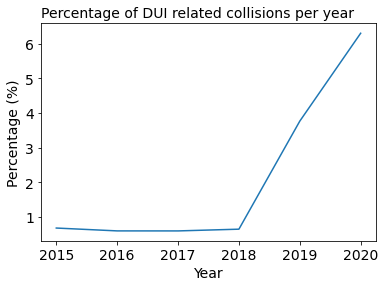

In [22]:
#visualize it
year = ['2015', '2016', '2017', '2018', '2019','2020']
percentage = [per_2015,per_2016,per_2017,per_2018,per_2019,per_2020]
plt.plot(year, percentage)

plt.title('Percentage of DUI related collisions per year', loc = 'left', fontsize = 14)

plt.xlabel('Year', fontsize = 14)
plt.ylabel('Percentage (%)', fontsize = 14)

plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

f4 = plt.gcf()

<h4>Visualization Description</h4>


There is a sharp incline in the percentage of DUIs from 2019 and on. The number of collisions reported each year are around the same number besides the decrease in observations in 2020. While the number of DUI collisions are dramatically higher in 2019 and 2020, the cause could be due to an increase in reporting accuracy of DUI collisions and not necessarily due to an increase in DUI collisions in 2019 and 2020.

(In the Geo mapping section, we also plot DUI collisions each year and the collisions over time to get a visual representation of the areas the collisions were reported).

To further understand our data, we organize our collisions data by hour to see whether we are going in the right direction according to our hypothesis.

In [23]:
df_hr = df['hour'].value_counts() # all collisions
df_dui_hr = df_dui['hour'].value_counts() # only DUI collisions

In [24]:
data = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]) 
  
# providing an index 
alc_percent_ser = pd.Series(data, index =range(24)) 
for i in range(len(df_dui_hr)):
    alc_percent = df_dui_hr[i] / df_hr[i]
    alc_percent_ser.iloc[i] = alc_percent

In [25]:
# seed random number generator
seed(1)
# generate some integers 
ran_values = randint(0, 24, 1028)

In [26]:
unique, counts = np.unique(ran_values, return_counts=True)
rand_dic = dict(zip(unique, counts/1000))

Text(0, 0.5, 'Collision rate')

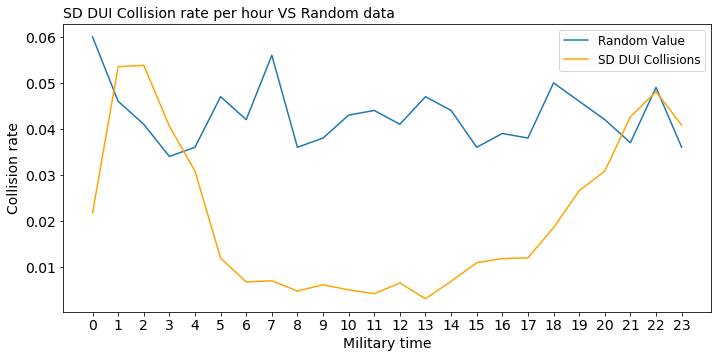

In [27]:
plt.axes([0, 0, 1.5, 1]) # stretches the plot

plt.plot(list(rand_dic.keys()),list(rand_dic.values()))
plt.plot(data, alc_percent_ser, color = 'orange')

plt.legend(["Random Value", "SD DUI Collisions"], fontsize = 12)
plt.title('SD DUI Collision rate per hour VS Random data', loc = 'left', fontsize = 14)
plt.xticks(data, fontsize = 14)
plt.yticks(fontsize = 14)
plt.xlabel('Military time', fontsize = 14)
plt.ylabel('Collision rate', fontsize = 14)

#sns.set(rc={'figure.figsize':(10.7,15.27)})

<h4>Visualization Description</h4>


The blue line is a plot of randomly generated data. The orange line is a plot of the percentage of collisions related to DUIs that occur per hour. The visualization shows that there is a peak of DUI collisions late at night and in the early moring. This visualization helps us visually compare whether our data is due to random chance alone or not. However, to further answer this question, we will need to go deeper into our analysis.

<h3>KS Test</h3>

Here, we try to answer the question: is the distribution of DUI collisions rate per hour due to random chance alone or not?

To answer this, we have the following:

Null hypothesis: The distribution of DUI collisions rate per hour is due to random chance alone.

Alternative hypothesis: The distribution of DUI collisions rate per hour is not due to random chance alone.

(We are assuming an alpha level of 0.05 for this analysis)

In [28]:
data = df_dui['hour'].values
loc, scale = norm.fit(data)
n = norm(loc=loc, scale=scale)

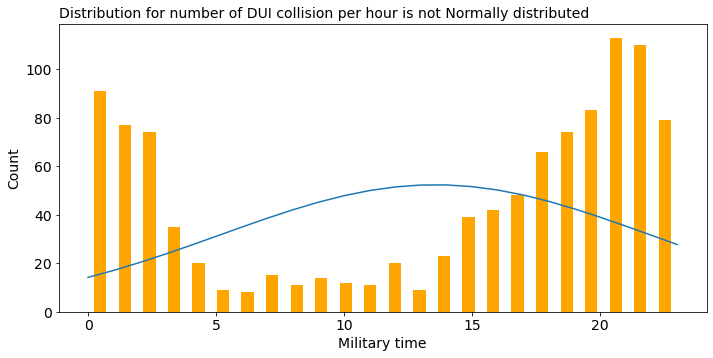

In [29]:
plt.axes([0, 0, 1.5, 1]) # stretches the plot

plt.hist(data, bins = 24, rwidth = 0.5, color = 'orange')
x = np.arange(24)
plt.plot(x, 1100*n.pdf(x))

plt.title('Distribution for number of DUI collision per hour is not Normally distributed', loc = 'left', fontsize = 14)

plt.xlabel('Military time', fontsize = 14)
plt.ylabel('Count', fontsize = 14)

plt.yticks(fontsize = 14)
plt.xticks(fontsize = 14)

plt.show()

In [30]:
kstest(data, n.cdf)

KstestResult(statistic=0.18854673445792963, pvalue=3.4865717670647964e-34)

**As our calculated p-value is extremly small, against our alpha level of 0.05, we reject the null hypothesis**

Thus, our distribution for the rate of DUI collisions per hour is not due to random chance. However, this does not answer whether time is a good predictor of DUI collisions. To understand this, we conduct Machine Learning using time as a predictor below.

<h3>Data Analysis & Data Visualization for Location</h3>

### Geo Mapping

In this section, we aim to explore how DUI collisions relate to the location of bars in San Diego.

To do this, we need to first visualize the location of DUI collisions on a map of San Diego.

In [31]:
# Filtering coordinates not in San Diego - our geocoding API gave us a few results which were not in San Diego
# county, and thus, we need to filter these points out. This could be a limitation in our data collected or
# the API results.

df_dui = df_dui[df_dui['long'] < -116.9]
df_dui = df_dui[df_dui['lat'] < 33.2]
df_dui = df_dui.reset_index()

In [32]:
# Converting longtitude, latitude pairs to Shapely Point objects

geom_list = []

for item in zip(df_dui['long'], df_dui['lat']):
    geom_list.append(Point(item))

To plot the points, we are using a shapefile of the map of San Diego.

In [33]:
# reading the shapefile of San Diego
sd_shapefile = geopandas.read_file('geo_mapping/tl_2018_06073_roads/tl_2018_06073_roads.shp')

In [34]:
# Creating a GeoPandas GeoDataFrame of df_dui

# epsg:4326 is the coordinate system we are using
geo_pd = geopandas.GeoDataFrame(df_dui, crs = {'init':'epsg:4326'}, geometry = geom_list)
geo_pd.head()

,index,report_id,date_time,year,month,hour,day,time_day,police_beat,address_no_primary,...,violation_type,charge_desc,injured,killed,hit_run_lvl,hit_run_lvl_code,lat,long,gcode,geometry
0,0,500207,2015-01-01 07:58:00,2015,1,7,1,1,122,800,...,VC,DUI ALCOHOL AND/OR DRUGS,0,0,NONE,0,32.808753,-117.259067,"800, Turquoise Street, La Jolla Mesa, Pacific ...",POINT (-117.25907 32.80875)
1,1,500338,2015-01-09 21:46:00,2015,1,21,9,4,242,8400,...,VC,DUI ALCOHOL AND/OR DRUGS,0,0,NONE,0,32.917948,-117.142544,"8400, Westmore Road, Mira Mesa, San Diego, San...",POINT (-117.14254 32.91795)
2,2,500572,2015-01-19 14:30:00,2015,1,14,19,2,517,3000,...,VC,DUI ALCOHOL AND/OR DRUGS,0,0,MISDEMEANOR,1,32.716991,-117.129439,"3000, C Street, Stockton, North Park, San Dieg...",POINT (-117.12944 32.71699)
3,3,500680,2015-01-24 22:35:00,2015,1,22,24,4,451,3400,...,VC,DUI ALCOHOL AND/OR DRUGS,0,0,NONE,0,32.743100,-117.052040,"3400, College Avenue, Rolando Park, San Diego,...",POINT (-117.05204 32.74310)
4,4,500745,2015-01-26 08:32:00,2015,1,8,26,1,521,1600,...,VC,DUI ALCOHOL AND/OR DRUGS,0,0,NONE,0,32.716898,-117.149345,"1600, C Street, East Village, Banker's Hill, S...",POINT (-117.14934 32.71690)


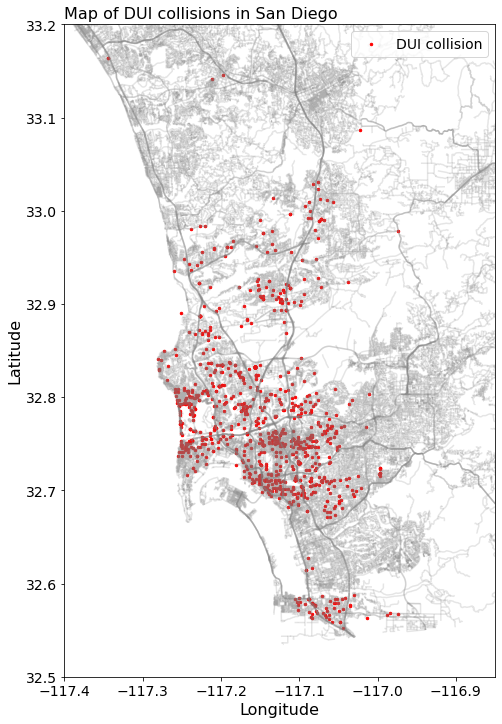

In [35]:
# Plotting the points of DUI collisions on a map of San Diego

figure, ax = plt.subplots(figsize = (12,12))
sd_shapefile.plot(ax = ax, alpha = 0.2, color = 'grey')

ax.set_xlim([-117.4, -116.85])
ax.set_ylim([32.5, 33.2])

plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
ax.set_title('Map of DUI collisions in San Diego', fontsize = 16, loc = 'left')
ax.set_xlabel('Longitude', fontsize = 16)
ax.set_ylabel('Latitude', fontsize = 16)

geo_pd['geometry'].plot(ax = ax, markersize = 6, color = 'red', label = 'DUI collision')
plt.legend(loc = 'upper right', fontsize = 14)

Let us now visualize our DUI collisions data each year to see the difference in the cases reported.

In [36]:
def str_to_year(string):
    return int(string[0:4])

geo_pd['year'] = geo_pd['date_time'].apply(str_to_year)

In [37]:
array_of_years = geo_pd['year'].unique()

In [38]:
# This may take a while to run
# Plot of DUI collisions each year

# The code has been commented as we do not need to run it again - the plots produced are saved in a jpg form
'''
for i in array_of_years:
    
    figure, ax = plt.subplots(figsize = (12,12))
    sd_shapefile.plot(ax = ax, alpha = 0.2, color = 'grey')
    
    ax.set_xlim([-117.35, -116.9])
    ax.set_ylim([32.5, 33.2])

    plt.xticks(fontsize = 14, rotation = 55)
    plt.yticks(fontsize = 14)
    
    ax.set_title('DUI collisions in San Diego Each Year', fontsize = 16, loc = 'left')
    ax.set_xlabel('Longitude', fontsize = 16)
    ax.set_ylabel('Latitude', fontsize = 16)
    
    geo_pd_year = geo_pd[geo_pd['year'] == i]
    geo_pd_year = geopandas.GeoDataFrame(geo_pd_year)
    geo_pd_year['geometry'].plot(ax = ax, markersize = 6, color = 'red', label = 'DUI collision')
    
    plt.legend(loc='upper right', fontsize = 14)
    ax.text(-117.24, 32.64, str(i), fontsize = 14)
    
    plt.savefig('map_each_year_' + str(i) + '.jpg')
    plt.close() '''

"\nfor i in array_of_years:\n    \n    figure, ax = plt.subplots(figsize = (12,12))\n    sd_shapefile.plot(ax = ax, alpha = 0.2, color = 'grey')\n    \n    ax.set_xlim([-117.35, -116.9])\n    ax.set_ylim([32.5, 33.2])\n\n    plt.xticks(fontsize = 14, rotation = 55)\n    plt.yticks(fontsize = 14)\n    \n    ax.set_title('DUI collisions in San Diego Each Year', fontsize = 16, loc = 'left')\n    ax.set_xlabel('Longitude', fontsize = 16)\n    ax.set_ylabel('Latitude', fontsize = 16)\n    \n    geo_pd_year = geo_pd[geo_pd['year'] == i]\n    geo_pd_year = geopandas.GeoDataFrame(geo_pd_year)\n    geo_pd_year['geometry'].plot(ax = ax, markersize = 6, color = 'red', label = 'DUI collision')\n    \n    plt.legend(loc='upper right', fontsize = 14)\n    ax.text(-117.24, 32.64, str(i), fontsize = 14)\n    \n    plt.savefig('map_each_year_' + str(i) + '.jpg')\n    plt.close() "

Using ImageMagick, we have converted the images to a gif using the terminal code:

convert -delay 90 map_each_year*.jpg map_each_year.gif

(Make sure the code is run in the same directory as the images)

Learn more about how to do this here: https://towardsdatascience.com/how-to-make-a-gif-map-using-python-geopandas-and-matplotlib-cd8827cefbc8

**Here's the gif of the DUI accidents recorded each year**
<img src = 'geo_mapping/map_each_year.gif'>

Let us also visualize how our plot of DUI collisions look overtime/cummulative

In [39]:
# Over time plot
# The code has been commented as we do not need to run it again - the plots produced are saved in a jpg form

'''
figure, ax = plt.subplots(figsize = (12,12))
sd_shapefile.plot(ax = ax, alpha = 0.2, color = 'grey')

ax.set_xlim([-117.35, -116.9])
ax.set_ylim([32.5, 33.2])

plt.xticks(fontsize = 14, rotation = 55)
plt.yticks(fontsize = 14)

count = 0
for i in array_of_years:
    
    ax.set_title('DUI collisions in San Diego Over Time', fontsize = 16, loc = 'left')
    ax.set_xlabel('Longitude', fontsize = 16)
    ax.set_ylabel('Latitude', fontsize = 16)
    
    geo_pd_year = geo_pd[geo_pd['year'] == i]
    geo_pd_year = geopandas.GeoDataFrame(geo_pd_year)
    geo_pd_year['geometry'].plot(ax = ax, markersize = 6, color = 'red')
    
    # shifts text down by a little amount each iterator
    ax.text(x = -117.24, y = 32.64 - count, s = str(i), fontsize = 13)
    count += 0.025
    
    plt.savefig('map_year_' + str(i) + '_over_time' + '.jpg')
    #plt.close()
'''

"\nfigure, ax = plt.subplots(figsize = (12,12))\nsd_shapefile.plot(ax = ax, alpha = 0.2, color = 'grey')\n\nax.set_xlim([-117.35, -116.9])\nax.set_ylim([32.5, 33.2])\n\nplt.xticks(fontsize = 14, rotation = 55)\nplt.yticks(fontsize = 14)\n\ncount = 0\nfor i in array_of_years:\n    \n    ax.set_title('DUI collisions in San Diego Over Time', fontsize = 16, loc = 'left')\n    ax.set_xlabel('Longitude', fontsize = 16)\n    ax.set_ylabel('Latitude', fontsize = 16)\n    \n    geo_pd_year = geo_pd[geo_pd['year'] == i]\n    geo_pd_year = geopandas.GeoDataFrame(geo_pd_year)\n    geo_pd_year['geometry'].plot(ax = ax, markersize = 6, color = 'red')\n    \n    # shifts text down by a little amount each iterator\n    ax.text(x = -117.24, y = 32.64 - count, s = str(i), fontsize = 13)\n    count += 0.025\n    \n    plt.savefig('map_year_' + str(i) + '_over_time' + '.jpg')\n    #plt.close()\n"

Converting the images to a gif using ImageMagick again using the terminal code:

convert -delay 90 map_year_*.jpg map_over_time.gif

(Make sure the code is run in the same directory as the images)

**Here's the gif of the DUI accidents recorded over time**
<img src = 'geo_mapping/map_over_time.gif'>

Through these visualizations, we can observe the formation of a few clusters in certain parts of San Diego. To better visualize the clusters of DUI collisions present around San Diego, we plotted a heat map using Folium.

References to Folium heatmap code:
* https://alysivji.github.io/getting-started-with-folium.html

* https://stackoverflow.com/questions/61928013/adding-a-title-or-text-to-a-folium-map

In [40]:
map_sd_dui = folium.Map([32.8, -117.17], tiles = "CartoDB positron", zoom_start = 11) # approximate center

for i in range(len(df_dui)):
    folium.CircleMarker([df_dui['lat'][i], df_dui['long'][i]], radius = 0.1, color = 'tomato').add_to(map_sd_dui)

map_sd_dui.get_root().html.add_child(folium.Element('''<h5 align = "left">Heatmap of DUI Collisions in San Diego</h5>'''))

lat_long_arr = df_dui[['lat', 'long']].to_numpy()
map_sd_dui.add_children(plugins.HeatMap(lat_long_arr, radius = 10))
map_sd_dui

# This outputs a dynamic, interactive heatmap of all DUI collisions in San Diego

### Bootstrapping

Now, to further answer our hypothesis, we want to analyze whether DUI collisions are spread out across San Diego randomly, or are they spread out close to bars.

To do this, we need to first check whether the DUI collisions are spread out across San Diego due to random chance alone or not. We hypothesize:

Null hypothesis: DUI collisions in San Diego are distributed due to random chance alone.

Alternative hypothesis: DUI collisions in San Diego are not distributed due to random chance alone.

(Assuming an alpha level of 0.05)

To analyze this, we perform bootstrapping to generate a null distribution of collision points in San Diego. We calculate a test-statistic, the Average Nearest Neighbors (ANN) statistic for our case, on each randomly generated distribution.

In [41]:
#function to randomly distribute points
def rand_dist(n_points):
    lat_list = []
    long_list = []
    
    for i in range(0, n_points):
        
        lat_rand = random.uniform(-117.255, -117.0)
        long_rand = random.uniform(32.55, 33.0)
        
        while (lat_rand < -117.1) & (long_rand < 32.7):
            lat_rand = random.uniform(-117.255, -117.0)
            long_rand = random.uniform(32.55, 33.0)
        
        long_list.append(long_rand)
        lat_list.append(lat_rand)
    
    coor_list = list(zip(lat_list, long_list))
    df_rand_gen = pd.DataFrame(coor_list, columns = ['long', 'lat'])
    
    return df_rand_gen

In [42]:
# This creates a dataframe of randomly generated points in San Diego
df_rand = rand_dist(df_dui.shape[0])

The below function is used to find the nearest coordinate in a dataframe when given the latitude and longitude. After it finds the nearest coordinate, it computes the distance to it (in kilometers) and returns it. This function is called on each coordinate of the randomly generated distribution of points to compute an ANN statistic.

The ANN statistic is computed by summing the distances of each point to its nearest neighbor and dividing it by the total number of points. 

In [43]:
# Requires df_coor to be a global variable containing the randomly generated points

def nearest_coordinate_finder(index):
    
    df_coor_func = df_coor.copy()
        
    coord_to_search_against = tuple((df_coor_func['lat'][index], df_coor_func['long'][index]))
    
    df_coor_func['lat'][index] = 0
    df_coor_func['long'][index] = 0
    
    list_of_coor = list(zip(df_coor_func['lat'], df_coor_func['long']))
    
    # Uses KDTree to find the nearest neighbor
    knn_obj = KDTree(list_of_coor)
    
    result_query = knn_obj.query(coord_to_search_against)
    index_to_search = result_query[1]
        
    nearest_coor = list_of_coor[index_to_search]
    
    return distance.distance(coord_to_search_against, nearest_coor).km #result in kilometer

The below code calls the rand_dist function a 1000 times and computes the ANN statistic each time. The computed ANN statistic is stored in a list named 'list_ann' which we saved onto a file called 'ann.json' so that we do not have to run the bootstrapping code again (as it took us almost 2 hours to run it).

In [44]:
'''
list_ann = []
for i in range(1000):
    df_coor = rand_dist(df_dui.shape[0])
  
    list_of_distances = []
    for x in range(len(df_coor)):
        list_of_distances.append(nearest_coordinate_finder(x))

ann_statistic = (sum(list_of_distances))/(len(list_of_distances))
list_ann.append(ann_statistic)
'''

'\nlist_ann = []\nfor i in range(1000):\n    df_coor = rand_dist(df_dui.shape[0])\n  \n    list_of_distances = []\n    for x in range(len(df_coor)):\n        list_of_distances.append(nearest_coordinate_finder(x))\n\nann_statistic = (sum(list_of_distances))/(len(list_of_distances))\nlist_ann.append(ann_statistic)\n'

In [45]:
# reading the list of ANN statistics of the null distribution
with open("geo_mapping/ann.json", "r") as file:
    list_ann = json.load(file)

Mean: 0.48374718572766856
Standard Deviation: 0.007754423643634077


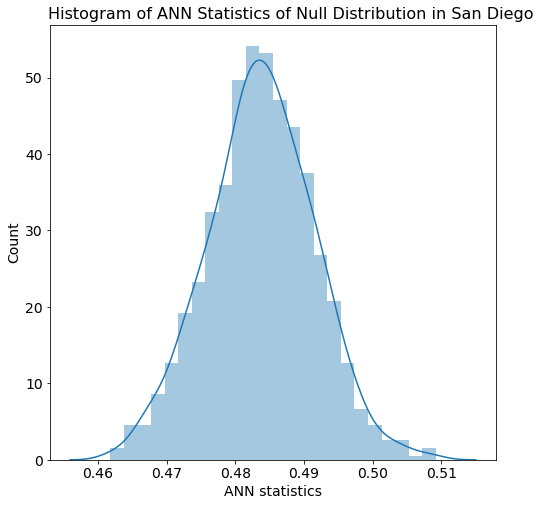

In [46]:
figure, ax = plt.subplots(figsize = (8,8))
ax = sns.distplot(list_ann)

ax.set_xlabel('ANN statistics', fontsize = 14)
ax.set_ylabel('Count', fontsize = 14)

plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

ax.set_title('Histogram of ANN Statistics of Null Distribution in San Diego', y = 1, x = 0.54, fontsize = 16)

ann_null_mean = np.mean(list_ann)
ann_null_std = np.std(list_ann)

print("Mean: " + str(ann_null_mean))
print("Standard Deviation: " + str(ann_null_std))

We can observe that the ANN statistic of the null distribution generates a normal curve with a mean of around 0.4837 and a standard deviation of around 0.0078

In [47]:
# Creating df_coor = df_dui as our nearest_coordinate_finder function requires df_coor

df_coor = df_dui[['lat', 'long']]
df_coor = df_coor.reset_index()

list_of_distances = []
for x in range(len(df_coor)):
    list_of_distances.append(nearest_coordinate_finder(x))

df_dui_ann_stat = (sum(list_of_distances))/(len(list_of_distances))
print(df_dui_ann_stat)

0.28773621582137343


**The ANN statistic of DUI collisions is around 0.2877**

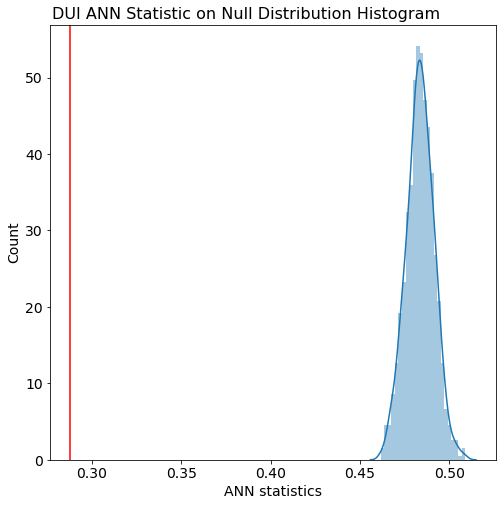

In [48]:
figure, ax = plt.subplots(figsize = (8,8))
ax = sns.distplot(list_ann)

ax.set_xlabel('ANN statistics', fontsize = 14)
ax.set_ylabel('Count', fontsize = 14)

plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

ax.set_title('DUI ANN Statistic on Null Distribution Histogram', y = 1, x=0.44, fontsize = 16)

plt.axvline(df_dui_ann_stat, 0, 50, color='red')

Here, we can observe that the ANN statistic of DUI collisions is very extreme compared to the ANN statistic of the null distribution. Calculating the p-value by z-scoring the statistic:

In [49]:
df_dui_z_score = (df_dui_ann_stat - ann_null_mean)/ann_null_std
df_dui_p_value = (scipy.stats.norm.sf(abs(df_dui_z_score)))
print("p-value: " + str(df_dui_p_value)) # the value is essentially 0

p-value: 2.837417532661006e-141


Thus, we can observe that the p-value for the ANN statistic of DUI collisions is about 0, which is lesser than our alpha level. Thus, we <b>reject our null hypothesis</b> - our DUI collisions data is not distributed due to random chance.

### Bootstrapping (accounting for bar locations):

Now that we know that DUI collisions are not distributed due to random chance, we need to still test out our hypothesis that DUI collisions are spread out closer to bars in San Diego.

We hypothesize: 

Null hypothesis: DUI collisions in San Diego are distributed according to the location of bars. 

Or, in other words: The ANN statistic of the distribution of DUI collisions = The ANN statistic of the distribution of collisions generated using bar density.

<br>

Alternative hypothesis: DUI collisions in San Diego are not distributed according to the location of bars. 

Or, in other words: The ANN statistic of the distribution of DUI collisions != The ANN statistic of the distribution of collisions generated using bar density.

(Assuming an alpha level of 0.05)

Using the data on bar locations we compiled earlier, we need to start with the distribution of randomly generated collisions while accounting for bar density of an area.

We retrieved a shapefile that contains Shapely's Polygon objects that are separated by city council districts. 

In [50]:
# Importing shapefile
sd_shapefile_districts = geopandas.read_file('geo_mapping/RDW_District_Data-shp/RDW_District_Data.shp')
sd_shapefile_districts = sd_shapefile_districts.to_crs({'init':'epsg:4326'})
sd_shapefile_districts.head() # notice the geometry column

,OBJECTID,DISTRICT,WEBSITE,CODE,JUR_NAME,NAME,PHONE,ShapeSTAre,ShapeSTLen,geometry
0,1,4,https://www.escondido.org/city-council.aspx,ES,ESCONDIDO,Michael Morasco,(760) 839-4638,2.863887e+08,239084.951974,"POLYGON ((-117.11064 33.09460, -117.11064 33.0..."
1,2,2,https://www.escondido.org/city-council.aspx,ES,ESCONDIDO,John Masson,(760) 839-4638,4.935725e+08,303649.767330,"MULTIPOLYGON (((-117.02452 33.17041, -117.0237..."
2,3,1,https://www.escondido.org/consuelo-martinez-co...,ES,ESCONDIDO,Consuelo Martinez,(760) 839-4638,6.895204e+07,40508.468051,"POLYGON ((-117.07528 33.14522, -117.07496 33.1..."
3,4,3,https://www.escondido.org/city-council.aspx,ES,ESCONDIDO,Olga Diaz,(760) 839-4638,1.901403e+08,109931.003743,"POLYGON ((-117.06027 33.13525, -117.06024 33.1..."
4,5,1,https://www.san-marcos.net/your-government/cit...,SM,SAN MARCOS,Maria Nunez,(760) 744-1050,9.962057e+07,72568.226265,"POLYGON ((-117.21175 33.14169, -117.21215 33.1..."


In [51]:
# Creating a Point object
list_of_bar_cord = []

for i in bar_dict:
    list_of_bar_cord.append((Point(bar_dict[i][1], bar_dict[i][0])))

Now, using both the shapefile Polygon geometry and the list of bar coordinates, we can count the total number of bars in each observation as well as the bar density. We create two columns to keep track of this.

In [52]:
sd_shapefile_districts['bar_count'] = 0

for i in list_of_bar_cord:
    for x in range(len(sd_shapefile_districts)):
        
        if(sd_shapefile_districts['geometry'][x].contains(i)):
            sd_shapefile_districts['bar_count'][x] += 1


In [53]:
# Get the sum of all the bar counts in SD
all_bars = sd_shapefile_districts['bar_count'].sum()

# Initialize the column
sd_shapefile_districts['bar_density'] = 0.0

for i in range(len(sd_shapefile_districts)):
    sd_shapefile_districts['bar_density'][i] = ((sd_shapefile_districts['bar_count'][i])/all_bars)

Let us visualize the distribution of bars around San Diego using a choropleth map.

<AxesSubplot:title={'left':'Choropleth Map of San Diego accounting for bar density'}, xlabel='Longitude', ylabel='Latitude'>

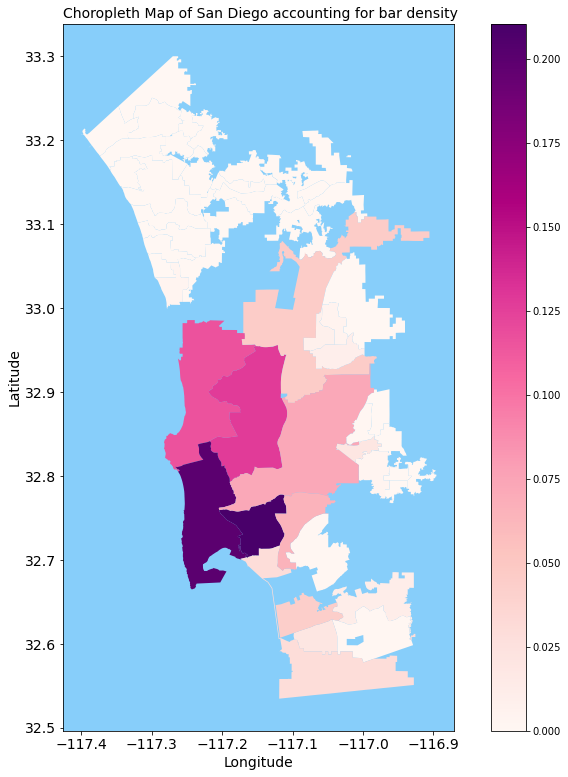

In [54]:
figure, ax = plt.subplots(figsize = (13,13))

plt.title('Choropleth Map of San Diego accounting for bar density', loc = 'left', fontsize = 14)

plt.xlabel('Longitude', fontsize = 14)
plt.ylabel('Latitude', fontsize = 14)

plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

ax.set_facecolor('lightskyblue') # Sets the background to be blue to help contrast with the white

sd_shapefile_districts.plot(column = 'bar_density', ax = ax, cmap = 'RdPu', legend = True)

The bar density of a row is the probability that there is a randomly generated point in that row. Thus, we can use bar density to randomly generate points in each observation to create a distribution of collisions.

To do this, we calculate the cumulative probabilities of each row. The cumulative probability is simply the sum of the bar densities of all rows prior to the current one. This helps us classify randomly generated points.

To generate this distribution, we randomly generate a float between 0 and 1. We then classify the float using the cumulative probability to its respective row.

In [55]:
# Initialize the column
sd_shapefile_districts['cumulative_prob'] = 0.0

counter = 0.0
for i in range(len(sd_shapefile_districts['bar_density'])):
    counter += (sd_shapefile_districts['bar_density'][i])
    sd_shapefile_districts['cumulative_prob'][i] = counter

Following that, we drop districts that contain no bars and multiply our cumulative probabilties by 1000 (as it is easier to classify a float between 0 and 1000 rather than a float between 0 and 1).

In [56]:
sd_dropped_shapefile = sd_shapefile_districts[sd_shapefile_districts['bar_count'] != 0]
sd_dropped_shapefile = sd_dropped_shapefile.reset_index()

In [57]:
sd_dropped_shapefile['cumulative_prob'] = sd_dropped_shapefile['cumulative_prob'] * 1000

In [58]:
# Initialize the column 
# number of randomly generated DUI collision points to add in each row
sd_dropped_shapefile['points_to_add'] = 0

We write a function named cumulative_generator(), which generates a random float between 0.0 and 1000.0 and adds a point to a row if that random float lies within the cumulative probability range of that row.

In [59]:
# Requires the sd_dropped_shapefile to be a global variable, adds one point to the dataframe per call
def cumulative_generator():
    rand_num = random.uniform(0.0, 1000.0)
        
    for i in range(len(sd_dropped_shapefile['cumulative_prob'])):
        if(i == 0):
            if(0 < rand_num < float(sd_dropped_shapefile['cumulative_prob'][0])):
                sd_dropped_shapefile['points_to_add'][i] += 1
        
        else:
            if(float(sd_dropped_shapefile['cumulative_prob'][i-1]) < rand_num < float(sd_dropped_shapefile['cumulative_prob'][i])):
                sd_dropped_shapefile['points_to_add'][i] += 1

This function generates one collision in one of the rows, but we want to generate a 1000 points to create a null distribution of collisions. Thus, we call this function 1000 times and save the resulting dataframe to a csv for later reference.

In [60]:
# Add 1000 points to dataframe
for i in range(1000):
    cumulative_generator()

In [61]:
sd_dropped_shapefile.to_csv('bootstrapping_bar_control.csv')
sd_dropped_shapefile.head()

,index,OBJECTID,DISTRICT,WEBSITE,CODE,JUR_NAME,NAME,PHONE,ShapeSTAre,ShapeSTLen,geometry,bar_count,bar_density,cumulative_prob,points_to_add
0,8,9,3,https://www.chulavistaca.gov/departments/mayor...,CV,CHULA VISTA,Stephen C. Padilla,(619) 691-5044,5.205385e+08,141351.069215,"POLYGON ((-116.93349 32.61194, -116.93363 32.6...",1,0.001684,1.683502,1
1,9,10,1,https://www.chulavistaca.gov/departments/mayor...,CV,CHULA VISTA,John McCann,(619) 691-5044,4.370174e+08,217051.897249,"POLYGON ((-116.93349 32.61194, -116.93359 32.6...",7,0.011785,13.468013,19
2,10,11,4,https://www.chulavistaca.gov/departments/mayor...,CV,CHULA VISTA,Mike Diaz,(619) 691-5044,1.950124e+08,63700.007390,"POLYGON ((-117.09806 32.61299, -117.09805 32.6...",12,0.020202,33.670034,20
3,11,12,2,https://www.chulavistaca.gov/departments/mayor...,CV,CHULA VISTA,Jill Galvez,(619) 691-5044,3.013335e+08,112982.241299,"POLYGON ((-117.03753 32.64934, -117.03753 32.6...",26,0.043771,77.441077,48
4,16,17,1,http://www.ci.el-cajon.ca.us/your-government/c...,EC,EL CAJON,Gary Kendrick,None,2.007869e+08,98943.202922,"POLYGON ((-116.96236 32.79493, -116.96234 32.7...",2,0.003367,80.808081,4


We now have the number of collision points to map in each row. Now, we need to randomly generate the actual coordinates of these points in each district. We will do this with a similar function as used before, now called rand_dist_bars(). It takes a Polygon/Multi-Polygon object (represents one row) as well as the number of points to generate in that district (given by the points_to_add column). It returns a GeoSeries of these randomly generated coordinates.

This [link](https://stackoverflow.com/questions/55392019/get-random-points-within-polygon-corners?fbclid=IwAR1DO5VUjR0fkf0TUI_r5Yh2wvcRJTwK6pTPk8hsg6QS-kW0le30fMnBlcM) gave us the idea to use Polygon objects to add randomly generated points accounting for bar density.

In [62]:
# Takes a Polygon object and the number of points to generate within that object as parameters, returns GeoSeries
def rand_dist_bars(polygon_obj, n):
    
    lowest_long = polygon_obj.bounds[0]
    lowest_lat = polygon_obj.bounds[1]
    highest_long = polygon_obj.bounds[2]
    highest_lat = polygon_obj.bounds[3]

    points_to_add_bars = []
    counter = 0
    
    while counter < n:
        
        rand_bars_long = random.uniform(lowest_long, highest_long)
        rand_bars_lat = random.uniform(lowest_lat, highest_lat)
        
        # Point object
        random_coord = Point([rand_bars_long, rand_bars_lat])
        
        # Checking if Point is in Polygon object
        if (polygon_obj.contains(random_coord)):
            
            points_to_add_bars.append(random_coord)
            counter += 1
    
    # GeoSeries of Point objects
    return geopandas.GeoSeries(points_to_add_bars, crs = {'init':'epsg:4326'})    

We then take this function and call it on each observation of our dataframe, essentially returning the coordinates of all 1000 randomly generated collisions in SD when controlling for bar density.

In [63]:
# null_bars holds a list of GeoSeries of Point objects
null_bars = []

for x in range(len(sd_dropped_shapefile)):
    null_bars.append(rand_dist_bars(sd_dropped_shapefile['geometry'][x], sd_dropped_shapefile['points_to_add'][x]))

In [64]:
# Extract the Point objects from each GeoSeries so we just end up with a list of Point objects 
# In other words, it converts a nested list of GeoSeries into a list of Point objects to add
null_bars_allpts = []
for i in null_bars:
    for x in i:
        null_bars_allpts.append(x)

len(null_bars_allpts)

1000

With this, we have succesfully generated one random distribution of collisions while accounting for bar density. Now we perform bootstrapping to generate a null distribution.

The below code essentially calls the rand_dist_bars function a 1000 times and computes the ANN statistic each time using our nearest_coordinate_finder() function. The computed ANN statistic is stored in a list named 'bootstrapping_bars' which we saved onto a file called 'bootstrapping_bars_ann.json' so that we do not have to run the bootstrapping code again (as this also took us almost 2 hours to run).

In [65]:
'''
bootstrapping_bars = []

for j in range(0,1000):
    null_bars = []
    for item in range(0, len(sd_dropped_shapefile)):
        null_bars.append(rand_dist_bars(sd_dropped_shapefile['geometry'][item], sd_dropped_shapefile['points_to_add'][item]))
    
    null_bars_allpts = []
    for i in null_bars:
        for elem in i:
            null_bars_allpts.append(elem)
    
    geo_points_bars = geopandas.GeoSeries(null_bars_allpts, crs = {'init':'epsg:4326'})
    
    df_coor = pd.DataFrame(geo_points_bars)
    
    df_coor['lat'] = 0.0
    df_coor['long'] = 0.0
    
    for k in range(len(df_coor)):
        df_coor['long'][k] = float(df_coor[0][k].x)
        df_coor['lat'][k] = float(df_coor[0][k].y)
                                        
    list_of_distances_bars = []
    for i in range(len(df_coor)):
        list_of_distances_bars.append(nearest_coordinate_finder(i))
    
    ann_statistic_bars = (sum(list_of_distances_bars))/(len(list_of_distances_bars))
    bootstrapping_bars.append(ann_statistic_bars)
    
with open("bootstrapping_bars_ann.json", "w") as file_bar:
    json.dump(bootstrapping_bars, file_bar)
'''

'\nbootstrapping_bars = []\n\nfor j in range(0,1000):\n    null_bars = []\n    for item in range(0, len(sd_dropped_shapefile)):\n        null_bars.append(rand_dist_bars(sd_dropped_shapefile[\'geometry\'][item], sd_dropped_shapefile[\'points_to_add\'][item]))\n    \n    null_bars_allpts = []\n    for i in null_bars:\n        for elem in i:\n            null_bars_allpts.append(elem)\n    \n    geo_points_bars = geopandas.GeoSeries(null_bars_allpts, crs = {\'init\':\'epsg:4326\'})\n    \n    df_coor = pd.DataFrame(geo_points_bars)\n    \n    df_coor[\'lat\'] = 0.0\n    df_coor[\'long\'] = 0.0\n    \n    for k in range(len(df_coor)):\n        df_coor[\'long\'][k] = float(df_coor[0][k].x)\n        df_coor[\'lat\'][k] = float(df_coor[0][k].y)\n                                        \n    list_of_distances_bars = []\n    for i in range(len(df_coor)):\n        list_of_distances_bars.append(nearest_coordinate_finder(i))\n    \n    ann_statistic_bars = (sum(list_of_distances_bars))/(len(list_of

In [66]:
# reading the list of ANN statistics of the null distribution
bootstrapping_bars = []

with open("geo_mapping/bootstrapping_bars_ann.json", "r") as bar_boot:
    bootstrapping_bars = json.load(bar_boot)

We can now plot a histogram of the null distribution using our list of ANN statistics.

Mean: 0.48169338591669775
Standard Deviation: 0.010068648288632732


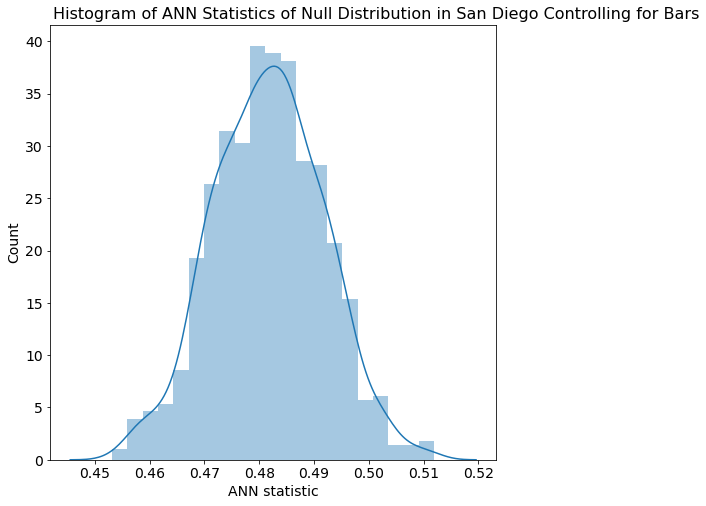

In [67]:
figure, ax = plt.subplots(figsize = (8,8))
ax = sns.distplot(bootstrapping_bars)
ax.set_title('Histogram of ANN Statistics of Null Distribution in San Diego Controlling for Bars', y = 1, x = 0.73, fontsize = 16)

ax.set_xlabel('ANN statistic', fontsize = 14)
ax.set_ylabel('Count', fontsize = 14)

plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

ann_bars_mean = np.mean(bootstrapping_bars)
ann_bars_std = np.std(bootstrapping_bars)

print("Mean: " + str(ann_bars_mean))
print("Standard Deviation: " + str(ann_bars_std))

We can observe that the ANN statistic of the null distribution generates a normal curve with a mean of around 0.4817 and a standard deviation of around 0.01007

Let us now see where our ANN statistic of DUI collisions data lies in the curve.

In [68]:
print("ANN statistic of DUI collisions: " + str(df_dui_ann_stat))

ANN statistic of DUI collisions: 0.28773621582137343


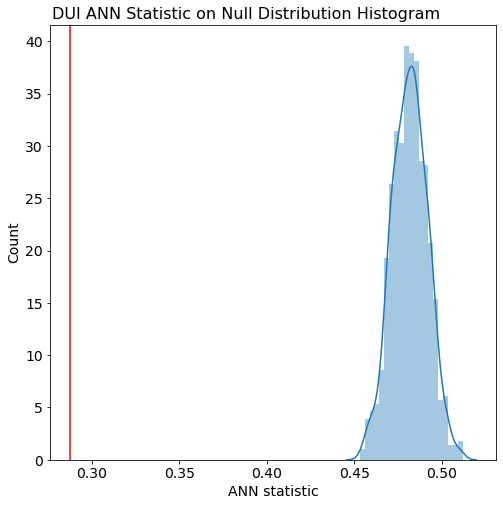

In [69]:
# Plotting the normal curve with ANN statistic of DUI
figure, ax = plt.subplots(figsize = (8,8))
ax = sns.distplot(bootstrapping_bars)

ax.set_xlabel('ANN statistic', fontsize = 14)
ax.set_ylabel('Count', fontsize = 14)

plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

ax.set_title('DUI ANN Statistic on Null Distribution Histogram', y = 1, x = 0.44, fontsize = 16)

plt.axvline(df_dui_ann_stat, 0, 50, color = 'red')

Here, we can observe that the ANN statistic of DUI collisions is very extreme compared to the null distribution. Calculating the p-value by z-scoring the statistic:

In [70]:
df_dui_bars_z_score = (df_dui_ann_stat - ann_bars_mean)/ann_bars_std
df_dui_p_value = (scipy.stats.norm.sf(abs(df_dui_bars_z_score)))
print("p-value: " + str(df_dui_p_value)) # the value is technically 0

p-value: 5.4410506862996195e-83


Thus, we can observe that the p-value for the ANN statistic of DUI collisions when controlling for bars is about 0, which is lesser than our alpha level of 0.05. Thus, we <b>reject our null hypothesis</b> - our DUI collisions data is not distributed according to bar location.

## Machine Learning

### Part 1: Using time as a predictor 

In this section, we are trying to <b>classify</b> whether an accident is DUI or non-DUI based on the grouping of hours. (Originally, we were using each hour as a predictor but the result was much worse.) 

Since we used k-Nearest Neighbors to predict the probability of DUI collision based on the density of bars (reasons detailed in the geomapping section), we would use the same model here to compare different predictors and see if grouping of hours is a better predictor than density of bars. However, KNN didn’t generate a good accuracy, so I also tried Support Vector Machine. The result is approximately the same. The code is thus excluded.

Since we have way more non-DUI cases than DUI cases, this is an imbalanced classification task where the majority of examples in the training dataset belong to the normal class and a minority of examples belong to the abnormal class. 

To deal with imbalanced datasets, we can either improve classification algorithms or balance classes in the training data. Here, we chose to implement both over-sampling and under-sampling. Oversampling randomly replicates the number of instances in the minority class to present a higher representation of the minority class in the sample. Undersampling under-sampling removes random records from the majority class, which can potentially lead to loss of information.


Learn how to do imbalanced classification tasks with [1] [2]

[1] https://www.analyticsvidhya.com/blog/2017/03/imbalanced-data-classification/

[2] https://www.kaggle.com/rafjaa/resampling-strategies-for-imbalanced-datasets

<h4>Using grouping of hours to predict the probability of DUI</h4>

Class 0: 57642
Class 1: 1083
Proportion: 53.22 : 1


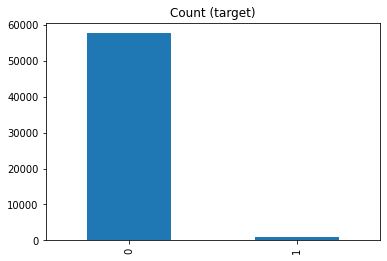

In [71]:
#Original count
target_count = df["DUI"].value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

target_count.plot(kind='bar', title='Count (target)');

In [72]:
# Class count
count_class_0, count_class_1 = df["DUI"].value_counts()

# Divide by class
df_class_0 = df[df['DUI'] == 0]
df_class_1 = df[df['DUI'] == 1]

Here, we try to oversample our data

Random over-sampling:
1    57642
0    57642
Name: DUI, dtype: int64


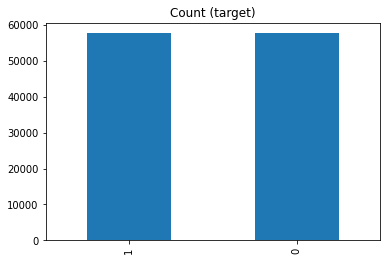

In [73]:
#Oversampling
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_test_over["DUI"].value_counts())

df_test_over["DUI"].value_counts().plot(kind='bar', title='Count (target)');

In [74]:
#Defining the train & test sets
num_training_over = int(df_test_over.shape[0]*0.8)
num_testing_over = int(df_test_over.shape[0]*0.2)

In [75]:
MR_X = df_test_over["time_day"]
MR_y = df_test_over["DUI"]

In [76]:
MR_train_X_old = MR_X[:num_training_over]
MR_train_y = MR_y[:num_training_over]
MR_test_X_old = MR_X[num_training_over:]
MR_test_y = MR_y[num_training_over:]
#reshape the x
MR_train_X = np.array(MR_train_X_old).reshape(-1, 1)
MR_test_X = np.array(MR_test_X_old).reshape(-1, 1)

In [77]:
# Might take a little while to run
knn = KNeighborsClassifier(n_neighbors = 5, algorithm = 'auto')

knn.fit(MR_train_X, MR_train_y)

Y_train_pred = knn.predict(MR_train_X)
Y_test_pred = knn.predict(MR_test_X)

In [78]:
print(classification_report(MR_train_y, Y_train_pred))

              precision    recall  f1-score   support

           0       0.68      0.84      0.75     57642
           1       0.57      0.35      0.44     34585

    accuracy                           0.66     92227
   macro avg       0.63      0.60      0.60     92227
weighted avg       0.64      0.66      0.63     92227



In [79]:
print(classification_report(MR_test_y, Y_test_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.35      0.52     23057

    accuracy                           0.35     23057
   macro avg       0.50      0.18      0.26     23057
weighted avg       1.00      0.35      0.52     23057



Here, we begin undersampling to see if the model works better.

Random under-sampling:
1    1083
0    1083
Name: DUI, dtype: int64


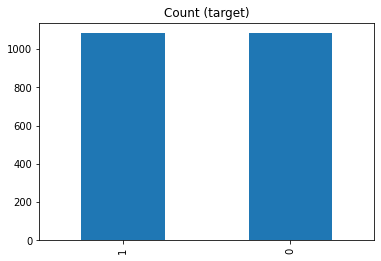

In [80]:
#Undersampling
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_test_under["DUI"].value_counts())

df_test_under["DUI"].value_counts().plot(kind='bar', title='Count (target)');

In [81]:
#Defining the train & test sets
num_training_under = int(df_test_under.shape[0]*0.8)
num_testing_under = int(df_test_under.shape[0]*0.2)

In [82]:
MR_X2 = df_test_under["time_day"]
MR_y2 = df_test_under["DUI"]

In [83]:
#Defining the train & test sets
num_training = int(df_test_under.shape[0]*0.8)
num_testing = int(df_test_under.shape[0]*0.2)

In [84]:
MR_train_X2_old = MR_X2[:num_training]
MR_train_y2 = MR_y2[:num_training]
MR_test_X2_old = MR_X2[num_training:]
MR_test_y2 = MR_y2[num_training:]

MR_train_X2 = np.array(MR_train_X2_old).reshape(-1, 1)
MR_test_X2 = np.array(MR_test_X2_old).reshape(-1, 1)

In [85]:
knn = KNeighborsClassifier(n_neighbors = 5, algorithm = 'auto')

knn.fit(MR_train_X2, MR_train_y2)

Y_train_pred2 = knn.predict(MR_train_X2)
Y_test_pred2 = knn.predict(MR_test_X2)

In [86]:
print(classification_report(MR_train_y2, Y_train_pred2))

              precision    recall  f1-score   support

           0       0.63      1.00      0.77      1083
           1       0.00      0.00      0.00       649

    accuracy                           0.63      1732
   macro avg       0.31      0.50      0.38      1732
weighted avg       0.39      0.63      0.48      1732



In [87]:
print(classification_report(MR_test_y2, Y_test_pred2))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00     434.0

    accuracy                           0.00     434.0
   macro avg       0.00      0.00      0.00     434.0
weighted avg       0.00      0.00      0.00     434.0



After undersampling and oversampling the dataset, the result shows that grouping of hours is not a good predictor for classifying DUI and non-DUI cases. We have tried both KNN and SVM, but both models generate similar results (only the result for KNN is shown here). The model only has about 55% to 75% accuracy for the training set. When it comes to the testing set, the model has perfect accuracy for DUI cases but it cannot predict any non-DUI cases. Based on the classification report, we can conclude that time is not an effctive predictor for our classification model.

### Part 2: Using spatial data as a predictor 

Here, we try to use K-nearest neighbors (KNN) to classify points into two different classes: DUI and non-DUI collisions. We are using KNN for our models as it works best for classification models involving spatial data.

As we require spatial data, we chose to do undersampling of non-DUI collisions as the API had a restriction on the number of geocoding requests we can make. Similar to the above approach, we randomly chose a sample of around 1100 rows from the dataframe of non-DUI collisions, and used the Google Places API to geocode the addresses into latitude and longitude. We saved this data in 'sd_non_dui_geolocation.csv'

In [88]:
df_coll = pd.read_csv('geo_mapping/sd_non_dui_geolocation.csv')
df_coll = df_coll[['address_primary', 'lat', 'long']] #taking only the import columns

print("Shape of dataframe is: " + str(df_coll.shape))
df_coll.head()

Shape of dataframe is: (1100, 3)


,address_primary,lat,long
0,"3500 COLLEGE AVENUE,San Diego,CA",32.744294,-117.054659
1,"3800 PERSHING AVENUE,San Diego,CA",32.747583,-117.134664
2,"8500 CLAIREMONT MESA BOULEVARD,San Diego,CA",32.832907,-117.143363
3,"0 LA JOLLA VILLAGE DRIVE,San Diego,CA",32.873395,-117.212326
4,"3200 OCEAN VIEW BOULEVARD,San Diego,CA",32.701210,-117.125158


(Note that the number of observations in non-DUI collisions is roughly equal to the number of observations of DUI collisions).

We now need two GeoDataFrames, geo_pd (dataframe of DUI collions) and geo_non_dui (dataframe of non-DUI collisions)

In [89]:
# Creating GeoDataFrame of non-DUI collisions
list_of_non_dui_cord = []

for i in range(len(df_coll)):
    list_of_non_dui_cord.append((Point(df_coll['long'][i], df_coll['lat'][i])))

geo_non_dui = geopandas.GeoDataFrame(crs = {'init':'epsg:4326'}, geometry = list_of_non_dui_cord)
geo_non_dui.head()

,geometry
0,POINT (-117.05466 32.74429)
1,POINT (-117.13466 32.74758)
2,POINT (-117.14336 32.83291)
3,POINT (-117.21233 32.87340)
4,POINT (-117.12516 32.70121)


In [90]:
# Appending both Dataframes to 'geo' and adding a column named 'dui' with values 0 or 1
geo = geo_pd
geo['dui'] = 1
geo = geo[['geometry', 'dui']]
geo_non_dui['dui'] = 0
geo = geo.append(geo_non_dui)
geo

,geometry,dui
0,POINT (-117.25907 32.80875),1
1,POINT (-117.14254 32.91795),1
2,POINT (-117.12944 32.71699),1
3,POINT (-117.05204 32.74310),1
4,POINT (-117.14934 32.71690),1
...,...,...
1095,POINT (-117.27849 32.83930),0
1096,POINT (-117.12683 32.83776),0
1097,POINT (-117.16108 32.71574),0
1098,POINT (-117.05040 32.80198),0


In [91]:
# Randomly shuffling all rows before splitting into train and test

geo = geo.sample(frac = 1).reset_index() # randomizes it - without replacement
geo.head()

,index,geometry,dui
0,215,POINT (-117.22001 32.75480),0
1,71,POINT (-117.10186 32.75721),1
2,563,POINT (-117.11453 32.70138),0
3,22,POINT (-117.15669 32.83277),1
4,584,POINT (-117.24389 32.86467),0


In [92]:
# Splitting Point objects into latitude and longitude

geo['lat'] = 0.0
geo['long'] = 0.0

for i in range(len(geo)):
    geo['lat'][i] = float((geo['geometry'][i]).y)
    geo['long'][i] = float((geo['geometry'][i]).x)

geo = geo[['index', 'geometry', 'dui', 'lat', 'long']]
geo.head()

,index,geometry,dui,lat,long
0,215,POINT (-117.22001 32.75480),0,32.754801,-117.220005
1,71,POINT (-117.10186 32.75721),1,32.757205,-117.101862
2,563,POINT (-117.11453 32.70138),0,32.701378,-117.114532
3,22,POINT (-117.15669 32.83277),1,32.832774,-117.156685
4,584,POINT (-117.24389 32.86467),0,32.864675,-117.243888


At this point, we have a Dataframe (geo) with the location of DUI and non-DUI collisions that are grouped by a 0 or a 1 in the 'dui' column.

We now split 80% of the data into training, and 20% into testing our KNN model/

In [93]:
X_train = geo[['lat', 'long']][0 : int(0.8*len(geo))]
Y_train = geo['dui'][0 : int(0.8*len(geo))]

X_test = geo[['lat', 'long']][int(0.8*len(geo)) : ]
Y_test = geo['dui'][int(0.8*len(geo)) : ]

In [94]:
# Calling KNN model on 17 neighbors
knn = KNeighborsClassifier(n_neighbors = 17, algorithm = 'auto') #should be an odd number

In [95]:
knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=17)

In [96]:
# Predicting
Y_train_pred = knn.predict(X_train)
Y_test_pred = knn.predict(X_test)

In [97]:
print(classification_report(Y_train, Y_train_pred))

              precision    recall  f1-score   support

           0       0.62      0.67      0.65       871
           1       0.64      0.59      0.61       854

    accuracy                           0.63      1725
   macro avg       0.63      0.63      0.63      1725
weighted avg       0.63      0.63      0.63      1725



In [98]:
print(classification_report(Y_test, Y_test_pred))

              precision    recall  f1-score   support

           0       0.60      0.61      0.60       229
           1       0.55      0.54      0.54       203

    accuracy                           0.58       432
   macro avg       0.57      0.57      0.57       432
weighted avg       0.58      0.58      0.58       432



Here, we can observe that the KNN model has a low accuracy in predicting DUI and non-DUI collisions based on location data, for both the training model and the testing model. We get an accuracy of around 60% in both.

Model improvement: We tried using a different number of nearest neighbors for our analysis, however, the differences in prediction accuracy were minimal. The major limitation of our model is the imbalance between the DUI and non-DUI classes as there are significantly more non-DUI collisions data than DUI. A balanced data might improve our spatial model.

Let us try to use this model by predcting whether bar locations in San Diego are DUI or non-DUI. Through this, if the model predicts majority of the cases to be DUI, it could mean that majority of bars are around DUI cases, and vice versa for non-DUI.

In [99]:
list_of_bar_cord = []

for i in bar_dict:
    list_of_bar_cord.append((bar_dict[i][0], bar_dict[i][1]))

In [100]:
df_bars = pd.DataFrame(list_of_bar_cord)
df_bars.columns = ['lat', 'long']

In [101]:
bar_pred = knn.predict(df_bars)
df_bars['pred'] = bar_pred

In [102]:
ratio_of_bars_dui = (df_bars['pred']).sum()/len(df_bars['pred'])
ratio_of_bars_dui

0.3446327683615819

Here, we can observe that only about 35% of bars were predicted as DUI, and the majority of the bars were predicted as non-DUI. Granted that our model is weak and we cannot assume the predictions are accurate, this prediction only further proves our findings from the bootstrapping that DUI collisions are not distributed according to bar locations/density.

## Conclusion and Discussion

We wanted to analyze DUI collisions to get a better understanding of why San Diego has a higher number of DUI cases compared to other cities. The goal of the project is to see if there is a correlation between DUI collisions and the variables of time of collision and the location of collision. Our background research made us believe that time and proximity to bars have some effect on DUI collisions. From this we hypothesized that more DUI collisions would occur from midnight to 3am and in close proximity to bars. We used traffic collisions data from the San Diego government's open database. We also used the Google Places API and the Nominatim API to obtain the geolocation of bars and collisions in San Diego.

We relied on bootstrapping and KS Test to see if DUI collisions are randomly distributed across San Diego County and time of day. Through bootstrapping, we found that DUI collisions across San Diego County are not distributed due to random chance alone, thereby rejecting our first null hypothesis. Through KS test, we found that the distribution of DUI collisions per hour is not normally distributed. Certain hours have a higher rate of DUI collisions. There is a correlation between hours and probability of DUI collisions with a p-value less than 0.05, thus rejecting the null hypothesis that DUI collisions are randomly distributed across different hours. Thus, we retain our first hypothesis.

As for our second question, we aim to find the correlation between presence of bars and DUI collisions. Through bootstrapping with accounting for bars, we found that DUI collisions are not distributed according to bar density either. Here, we rejected our null hypothesis which stated that DUI collisions are distributed according to bar locations. This means that there are extraneous factors responsible for the distribution of DUI collisions in San Diego as it is not randomly distributed and also not distributed according to bar density. With our analysis, we can conclude that we are rejecting our second hypothesis.

Based on the above information, we tried to come up with a predictive model to classify whether a collision at a specific time and location is a DUI collision or not. Based on the KNN models where we used both time and location as a predictor, we can conclude that time and location are not good predictors of DUI collisions as the accuracy of the models were extremely low. 

<br>
<br>
Limitations in the dataset include the fact that there is far more data in 2019 and 2020 compared to previous years, so our data is not evenly spread over the timeframe. This is likely due to a counting error or a lack of reporting in these previous years. Also, our dataset regarding collisions in San Diego is imbalanced as we have way more non-DUI collisions than DUI collisions. Because of this, the resampling method and the machine learning model we chose might not have generated an accurate model. An improved classification model for imbalanced dataset, a more balanced dataset, or a more advanced resampling technique might potentially lead to a higher accuracy.
 
Limitations regarding the occurrence of DUI collisions are influenced by the relationship between DUI collisions and addiction, venues where people purchase alcohol, location of police checkpoints and people’s drinking habits. DUI collisions are not necessarily to always occur at night because factors like addiction, which is a medical condition, could mean that the onset is prevalent at work during business hours or even before heading to work in the morning. DUI collisions are also not likely to only occur near bars because alcohol can be purchased from other venues such as alcohol serving restaurants, supermarkets, and liquor stores without service markup. Another reason why DUI collisions do not necessarily occur near bars is that individuals may get caught miles away from where they actually consumed alcohol, possibly from speeding or the lack of officers present in the venue. Also, as our dataset contains traffic collisions in San Diego, it only deals with DUI cases which met with an accident. If we had data on the location of DUI “violations”, i.e., individuals who were caught drinking and driving but did not meet with an accident, we might have been able to paint a better picture. However, such data was not publicly available.

Overall, from the above project we have a greater understanding that there is a correlation between DUI collisions and time, but no apparent correlation between DUI collisions and bar locations. We believe our project can aid the police enforcement and outreach programs in understanding when a large amount of collisions DUI occur. The police station can use this data to determine when they deploy more officers. Outreach programs benefit from our project by using it to know how they should use their resources to prevent more DUIs.

Future progressions of the project can be taken further by taking the analyses and data of current DUI prevention programs to isolate DUI factors and employ DUI prevention strategies. We can also look deeper into understanding existing trends in DUI collisions because alcohol sales have surged height of the pandemic due to traumatic circumstances that include record high unemployment, homelessness and domestic violence.
 ([Source](https://www.npr.org/2020/09/11/908773533/hangover-from-alcohol-boom-could-last-long-after-pandemic-ends)).

## Ethics And Privacy


* Possible bias in data collection exists in the traffic collision data because it was collected by police officers. The biases are not only limited to geographical location, but also personal biases of officers towards demographics that target race, gender, etc. 

* All of our data is publicly available and hence is already scrubbed of most of the PII information. In order to even further limit PII exposure, the data collected is scrubbed of the report id column from the San Diego dataset because there are other datasets that include information on the drivers. Other than the report id column, the rest of the data does not interfere with individuals’ personal privacy.

* The data is public and so are the locations of the bars and does not intend to tarnish the reputation of bars because a multitude of variables and factors lead to DUI collisions.

* Other factors that were not considered include: population density, DUI education of pertinent population, and police beat (the time and location of police officers present).

* Even though our analysis indicates that DUI collisions are not correlated to bars, there is still a risk of having police camp locations near bars or misdiagnosing situations, causing harm to businesses or to citizens.


## Team Contribution

* Overview, Question, Background, Hypothesis: Everyone

* Dataset: Everyone 

* Data collection and cleaning: Yueh-Ting & Jordyn

* Data visualization/EDA: Everyone

    * Geo Mapping Visualizations: Palaksh, Ahmed, & Peter

* Data analysis:

    * Bootstrapping (spatial):

        * Completely random: Palaksh & Ahmed 

        * Bar density: Palaksh & Ahmed

    * KS-Test for Time: Yueh-Ting

* Machine Learning:

    * Time: Yueh-Ting & Jordyn & Peter

    * Spatial: Palaksh

* Ethics/Privacy: Everyone

* Conclusion: Everyone